In [1]:
#Importing all the libraries:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.ticker import StrMethodFormatter


In [3]:
#Connecting to MySQL database:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="sprint2"
)

In [ ]:
#Reading data of mysql:
query = "SELECT * FROM amazonreport"
df = pd.read_sql(query, conn)
conn.close()

In [6]:
#Converting Amount to numeric, removing any currency symbols
df['Amount'] = pd.to_numeric(df['Amount'])

In [7]:
#1. Sales Overview Analysis:
#Total sales amount

total_sales = df[df['Status'].str.contains('Shipped')]['Amount'].sum()
print(f"Total Sales Amount: INR {total_sales:,.2f}")

Total Sales Amount: INR 71,034,344.00


In [14]:
#Total number of orders:

total_orders = len(df[df['Status'].str.contains('Shipped')])
print(f"Total Orders: {total_orders}")

Total Orders: 109670


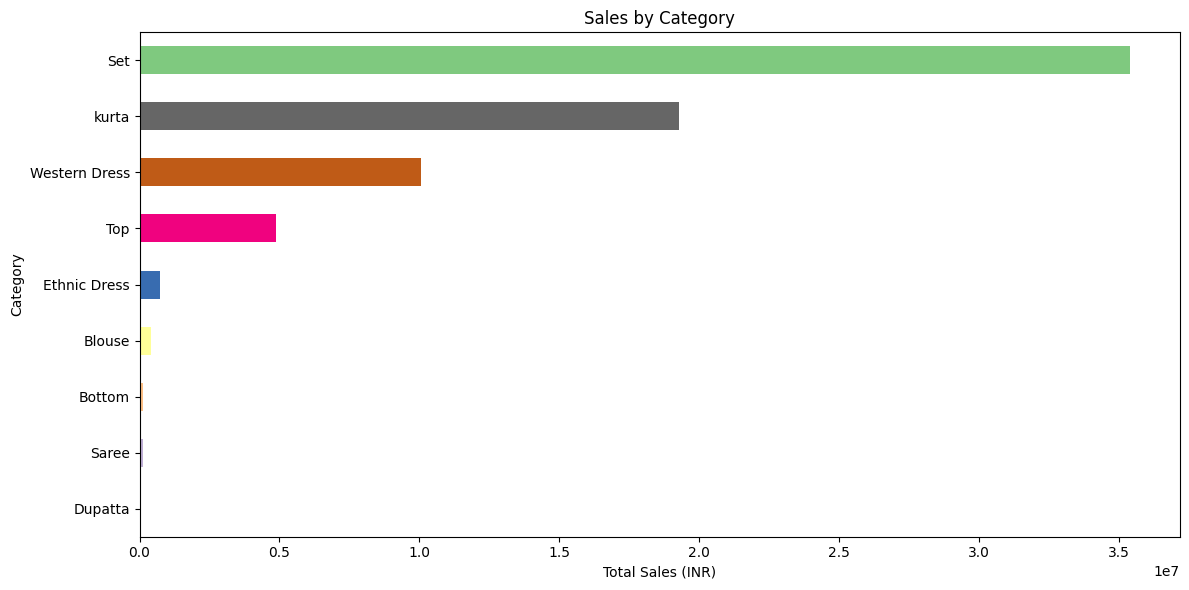

In [13]:
#2. Visualization 1: Category-wise Sales:

plt.figure(figsize=(12, 6))
category_sales = df[df['Status'].str.contains('Shipped')].groupby('Category')['Amount'].sum().sort_values(ascending=True)
colors = sns.color_palette("Accent")

#Plotting:
category_sales.plot(kind='barh', color=colors)
plt.title('Sales by Category')
plt.xlabel('Total Sales (INR)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10940\2478748221.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_dist.values, y=size_dist.index, palette=colors)


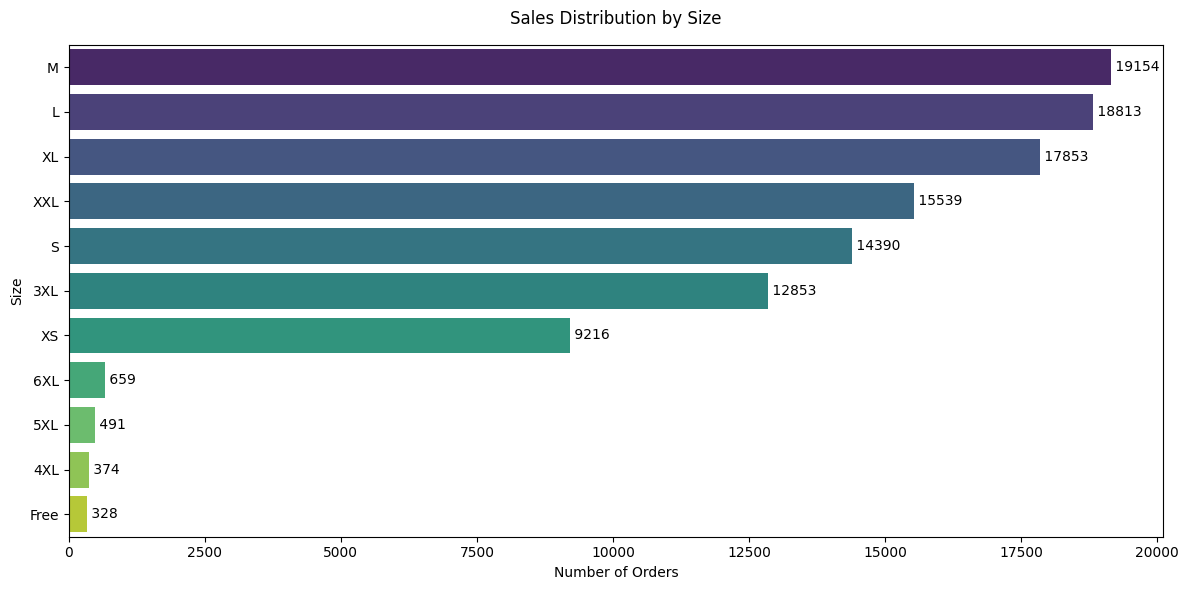

In [9]:
#3. Improved Size Distribution Visualization:

size_dist = df[df['Status'].str.contains('Shipped')]['Size'].value_counts()
colors = sns.color_palette("viridis", n_colors=len(size_dist))

plt.figure(figsize=(12, 6))

#Creating a bar plot:
sns.barplot(x=size_dist.values, y=size_dist.index, palette=colors)
plt.title('Sales Distribution by Size', fontsize=12, pad=15)
plt.xlabel('Number of Orders', fontsize=10)
plt.ylabel('Size', fontsize=10)

#Adding value labels on bars
for i, v in enumerate(size_dist.values):
    plt.text(v, i, f' {v}', va='center')

plt.tight_layout()
plt.show()

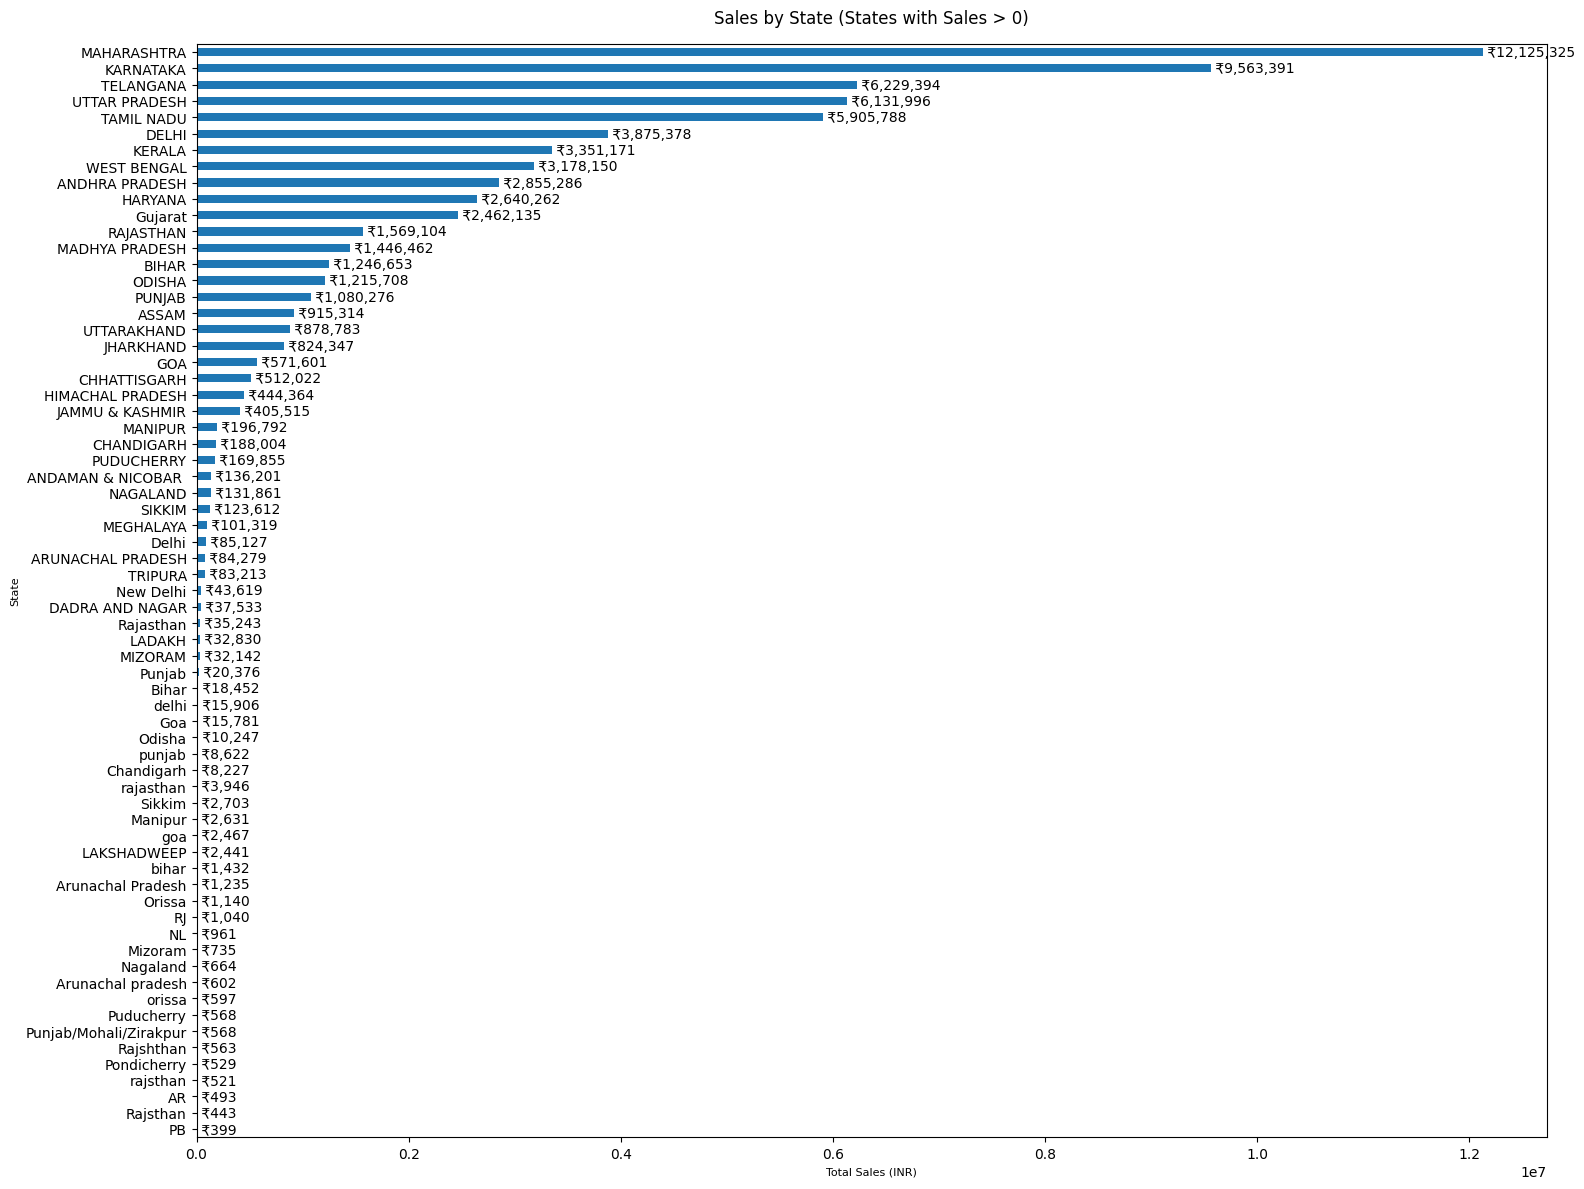

In [10]:
#4. Improved Geographic Analysis (Removing Zero Sales):
#Filtering states with sales > 0

state_sales = df[df['Status'].str.contains('Shipped')].groupby('ship-state')['Amount'].sum()
state_sales = state_sales[state_sales > 0].sort_values(ascending=True)

plt.figure(figsize=(16, 12))
state_sales.plot(kind='barh')
plt.title('Sales by State (States with Sales > 0)', fontsize=12, pad=15)
plt.xlabel('Total Sales (INR)', fontsize=8)
plt.ylabel('State', fontsize=8)

#Adding value labels on bars:
for i, v in enumerate(state_sales):
    plt.text(v, i, f' ₹{int(v):,}', va='center')

plt.tight_layout()
plt.show()

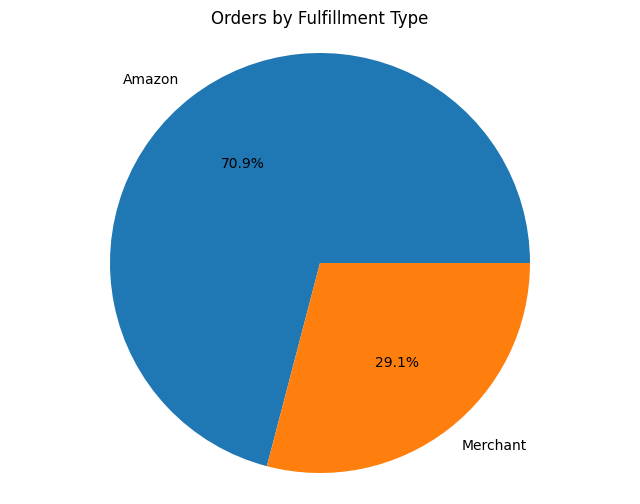

In [11]:
#5. Fulfillment Analysis:

plt.figure(figsize=(8, 6))
fulfillment_counts = df[df['Status'].str.contains('Shipped')]['Fulfilment'].value_counts()
plt.pie(fulfillment_counts, labels=fulfillment_counts.index, autopct='%1.1f%%')
plt.title('Orders by Fulfillment Type')
plt.axis('equal')
plt.show()
#If product is Ordered through Amazon, the fullfilment chances is high as compared to Merchant order.

In [12]:
#6. Cancellation Analysis:

cancellation_rate = (len(df[df['Status'] == 'Cancelled']) / len(df)) * 100
print(f"Order Cancellation Rate: {cancellation_rate:.2f}%")

Order Cancellation Rate: 14.21%


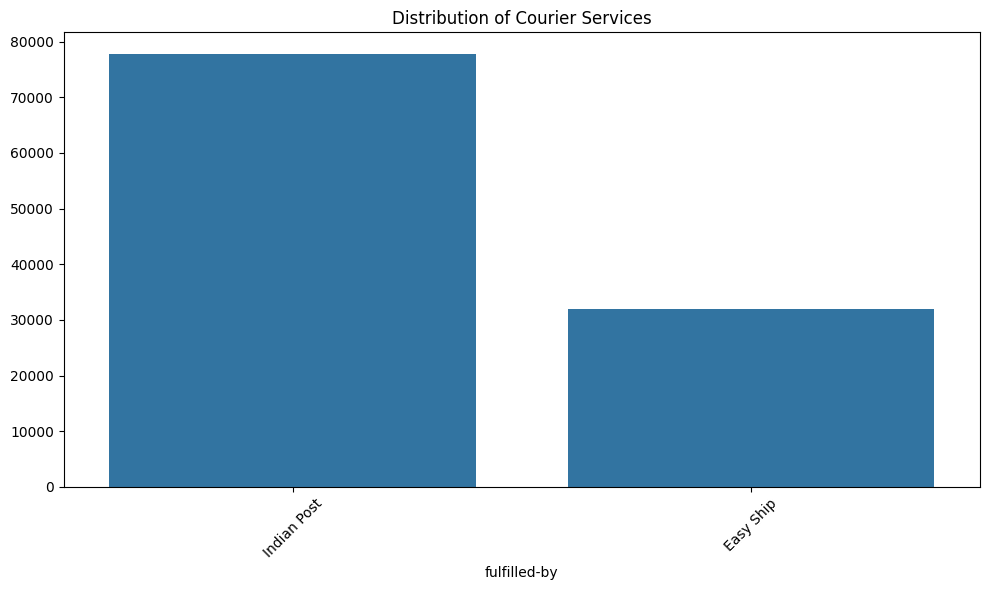

In [13]:
#7. Courier Service Analysis:

plt.figure(figsize=(10, 6))
courier_dist = df[df['Status'].str.contains('Shipped')]['fulfilled-by'].value_counts()
sns.barplot(x=courier_dist.index, y=courier_dist.values)
plt.title('Distribution of Courier Services')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

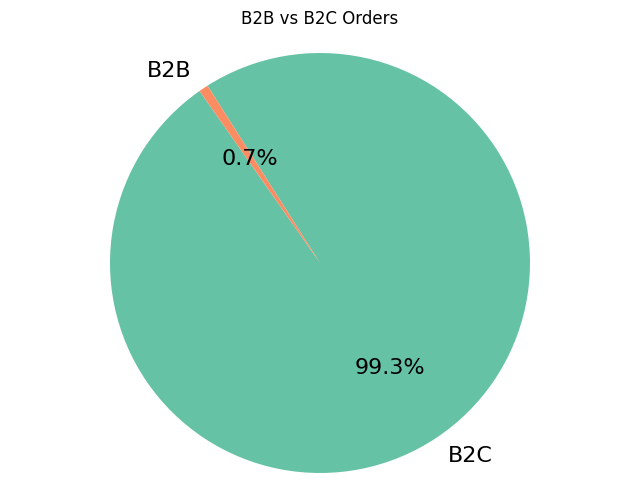

In [14]:
#8. Business Type Analysis (B2B vs B2C):

colors = sns.color_palette("Set2")
plt.figure(figsize=(8, 6))
b2b_dist = df[df['Status'].str.contains('Shipped')]['B2B'].value_counts()
plt.pie(b2b_dist, labels=['B2C', 'B2B'], autopct='%1.1f%%',colors=colors,
        startangle=125, textprops={'fontsize': 16})
plt.title('B2B vs B2C Orders')
plt.axis('equal')
plt.show()
#B2B

In [15]:
#9. Average Order Value:

avg_order_value = df[df['Status'].str.contains('Shipped')]['Amount'].mean()
print(f"Average Order Value: INR {avg_order_value:.2f}")

Average Order Value: INR 647.71


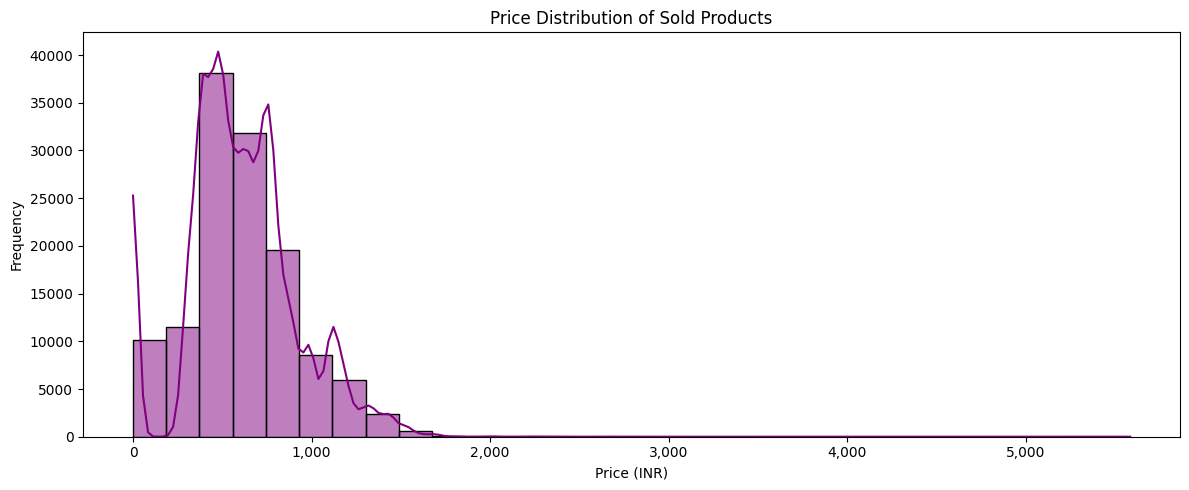

In [16]:
#10. Promotion Analysis:
#Price Distribution of sold products:

plt.figure(figsize=(12, 5))
sns.histplot(df['Amount'], bins=30, kde=True, color='purple')  #More bins is for finer granularity
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  #Adding thousands separators
plt.title('Price Distribution of Sold Products')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2956\3519075425.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amount', y='SKU', data=top_products_by_sales, palette='viridis')


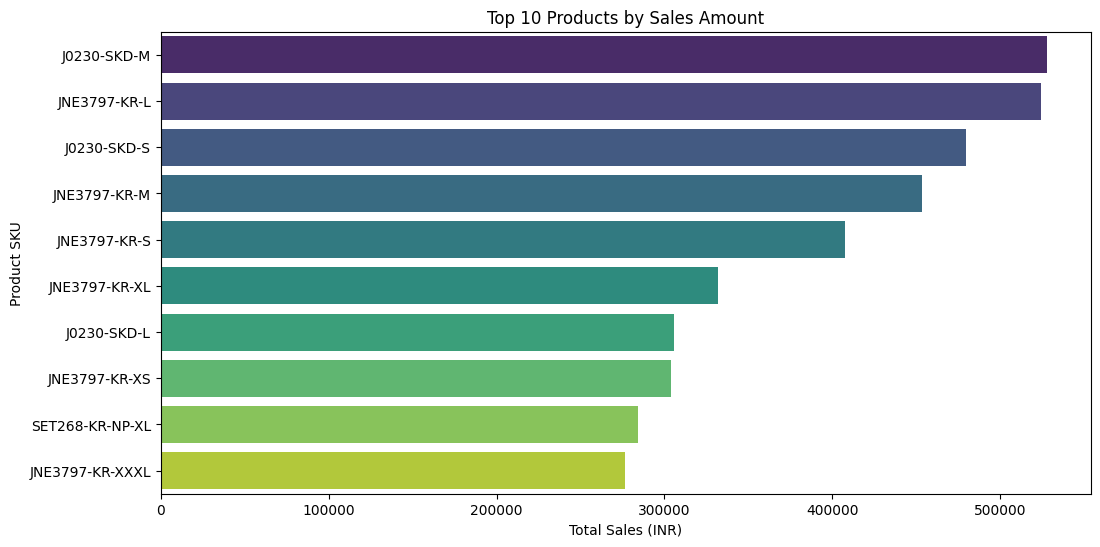

In [16]:
#11. Group by SKU and calculate total sales and quantity:

product_sales = df.groupby('SKU').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()

#Sort by total sales amount:
top_products_by_sales = product_sales.sort_values('Amount', ascending=False).head(10)

#Plot:
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='SKU', data=top_products_by_sales, palette='viridis')
plt.title('Top 10 Products by Sales Amount')
plt.xlabel('Total Sales (INR)')
plt.ylabel('Product SKU')
plt.show()